<a href="https://colab.research.google.com/github/Dfiora/Dfiora/blob/main/2024_12_10_Modelo_SARIMAX_PSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carrega as bibliotecas necessárias.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.api import VAR, SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

Lê o arquivo e prepara as séries para a modelagem. Antes de rodar, subir o arquivo '2024-12-09 - P14 Séries Modelo PSV.xlsx'

In [ ]:
# Carregar os dados do arquivo Excel
file_path = '2024-12-09 - P14 Séries Modelo PSV.xlsx'
data = pd.read_excel(file_path)

# Converter a coluna 'Date' para o formato datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m')

# Definir a coluna 'Date' como índice
data.set_index('Date', inplace=True)

Teste de Estacionariedade para as séries

In [ ]:
def test_stationarity(timeseries):
    # Use ts.adfuller instead of just adfuller
    result = ts.adfuller(timeseries.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'   {key}, {value}')

    p_value = result[1]

    if p_value > 0.05:
        print('A série não é estacionária.')
        return False  # Retorna False se a série não for estacionária
    else:
        print('A série é estacionária.')
        return True  # Retorna True se a série for estacionária

# Versão silenciosa da função de teste de estacionariedade
def test_stationarity_2(timeseries):
    # Use ts.adfuller instead of just adfuller
    result = ts.adfuller(timeseries.dropna())
    for key, value in result[4].items():
      p_value = result[1]
    if p_value > 0.05:
        return False  # Retorna False se a série não for estacionária
    else:
        return True  # Retorna True se a série for estacionária


for column in ['PSV Term Charter Rates, Middle East, 500-750m²',
              'PSV Term Charter Rates, SE Asia, 500-749m²',
              'PSV Term Charter Rates, US Gulf, 500-749m²',
              'PSV Term Charter Rates, Brazil, 500-800m²',
              'PSV Term Charter Rates, Mexico, 750-899m²',
              'PSV Term Charter Rates, WAFR, 600-799m² ',
              'PSV Term Charter Rates, North Sea, 500-749m²']:

    print(f'Teste de estacionariedade para {column}:')
    is_stationary = test_stationarity(data[column])

    if not is_stationary:
        print(f'{column} não é estacionária. Diferenciando...')
        data[column + '_diff'] = data[column].diff()

        print(f'Teste de estacionariedade para {column}_diff:')
        is_stationary_diff = test_stationarity(data[column + '_diff'])

        if not is_stationary_diff:  # Se ainda não for estacionária após a primeira diferenciação
            print(f'{column}_diff ainda não é estacionária. Diferenciando novamente...')
            data[column + '_diff2'] = data[column + '_diff'].diff()  # Diferenciar uma segunda vez
            print(f'Teste de estacionariedade para {column}_diff2:')
            test_stationarity(data[column + '_diff2'])

    print('---')

Teste de estacionariedade para PSV Term Charter Rates, Middle East, 500-750m²:
ADF Statistic: -0.7531112261964369
p-value: 0.8325089433277066
Critical Values:
   1%, -3.4924012594942333
Critical Values:
   5%, -2.8886968193364835
Critical Values:
   10%, -2.5812552709190673
A série não é estacionária.
PSV Term Charter Rates, Middle East, 500-750m² não é estacionária. Diferenciando...
Teste de estacionariedade para PSV Term Charter Rates, Middle East, 500-750m²_diff:
ADF Statistic: -1.410954081519014
p-value: 0.5770134735918299
Critical Values:
   1%, -3.4924012594942333
Critical Values:
   5%, -2.8886968193364835
Critical Values:
   10%, -2.5812552709190673
A série não é estacionária.
PSV Term Charter Rates, Middle East, 500-750m²_diff ainda não é estacionária. Diferenciando novamente...
Teste de estacionariedade para PSV Term Charter Rates, Middle East, 500-750m²_diff2:
ADF Statistic: -7.235334321449446
p-value: 1.9462415849638458e-10
Critical Values:
   1%, -3.4924012594942333
Critic

Roda (de maneira mais silenciosa) os testes de estacionariedade para as séries.

In [ ]:
for column in ['PSV Term Charter Rates, Middle East, 500-750m²',
              'PSV Term Charter Rates, SE Asia, 500-749m²',
              'PSV Term Charter Rates, US Gulf, 500-749m²',
              'PSV Term Charter Rates, Brazil, 500-800m²',
              'PSV Term Charter Rates, Mexico, 750-899m²',
              'PSV Term Charter Rates, WAFR, 600-799m² ',
              'PSV Term Charter Rates, North Sea, 500-749m²']:

    print(f'Teste de estacionariedade para {column}:')
    is_stationary = test_stationarity_2(data[column])

    if not is_stationary:
        print(f'{column} não é estacionária.')
    else:
        print(f'{column} é estacionária.')

    print('---')

Teste de estacionariedade para PSV Term Charter Rates, Middle East, 500-750m²:
PSV Term Charter Rates, Middle East, 500-750m² não é estacionária.
---
Teste de estacionariedade para PSV Term Charter Rates, SE Asia, 500-749m²:
PSV Term Charter Rates, SE Asia, 500-749m² não é estacionária.
---
Teste de estacionariedade para PSV Term Charter Rates, US Gulf, 500-749m²:
PSV Term Charter Rates, US Gulf, 500-749m² não é estacionária.
---
Teste de estacionariedade para PSV Term Charter Rates, Brazil, 500-800m²:
PSV Term Charter Rates, Brazil, 500-800m² não é estacionária.
---
Teste de estacionariedade para PSV Term Charter Rates, Mexico, 750-899m²:
PSV Term Charter Rates, Mexico, 750-899m² não é estacionária.
---
Teste de estacionariedade para PSV Term Charter Rates, WAFR, 600-799m² :
PSV Term Charter Rates, WAFR, 600-799m²  não é estacionária.
---
Teste de estacionariedade para PSV Term Charter Rates, North Sea, 500-749m²:
PSV Term Charter Rates, North Sea, 500-749m² não é estacionária.
---


Agora sabemos que temos 2 séries que tornam-se estacionárias após duas diferenciações e 4 séries que torname-se estacionárias após uma diferenciação.

Deste modo, vamos preparar uma base de dados onde todas as séries são integradas de ordem 1, de modo a alimentar o modelo SARIMAX com integração de ordem 1.

Para isso, vamos diferenciar uma vez as séries que tornam-se estacionárias após duas diferenciações, e deixar as demais inalateradas.

Organizando um dataframe que contém apenas as variáveis estacionárias e apenas as datas que podem ser utilizadas para o modelo.

In [ ]:
import pandas as pd

def test_stationarity_2(timeseries):
    # Use ts.adfuller instead of just adfuller
    result = ts.adfuller(timeseries.dropna())
    for key, value in result[4].items():
      p_value = result[1]
    if p_value > 0.05:
        return False  # Retorna False se a série não for estacionária
    else:
        return True  # Retorna True se a série for estacionária

# Criar um novo DataFrame vazio
model_data = pd.DataFrame()

# Lista das colunas originais para verificar
colunas_originais = ['PSV Term Charter Rates, Middle East, 500-750m²',
              'PSV Term Charter Rates, SE Asia, 500-749m²',
              'PSV Term Charter Rates, US Gulf, 500-749m²',
              'PSV Term Charter Rates, Brazil, 500-800m²',
              'PSV Term Charter Rates, Mexico, 750-899m²',
              'PSV Term Charter Rates, WAFR, 600-799m² ',
              'PSV Term Charter Rates, North Sea, 500-749m²']

# Iterar pelas colunas originais
for column in colunas_originais:
    # Verificar a estacionariedade da série original
    if test_stationarity_2(data[column]):
        # Se a série original for estacionária, adicione-a ao novo DataFrame
        model_data[column] = data[column]
    else:
        # Se a série original não for estacionária, verificar a primeira diferença
        if test_stationarity_2(data[column].diff().dropna()):
            # Se a primeira diferença for estacionária, adicione a série original ao novo DataFrame
            model_data[column] = data[column]
        else:
            # Se a primeira diferença não for estacionária, verificar a segunda diferença
            if test_stationarity_2(data[column].diff().diff().dropna()):
                # Se a segunda diferença for estacionária, adicione a série diferenciada uma vez ao novo DataFrame
                model_data[column + '_diff'] = data[column].diff().dropna()

# Exibir o novo DataFrame
model_data.head()

,"PSV Term Charter Rates, Middle East, 500-750m²_diff","PSV Term Charter Rates, SE Asia, 500-749m²_diff","PSV Term Charter Rates, US Gulf, 500-749m²","PSV Term Charter Rates, Brazil, 500-800m²","PSV Term Charter Rates, Mexico, 750-899m²","PSV Term Charter Rates, WAFR, 600-799m²","PSV Term Charter Rates, North Sea, 500-749m²"
Date,,,,,,,
2014-01-01,0.0,-187.5,13900.0,31000.0,24000.0,23500.0,14000.0
2014-02-01,0.0,-437.5,13850.0,31000.0,24000.0,22500.0,14000.0
2014-03-01,0.0,-312.5,13850.0,31000.0,24000.0,22500.0,14000.0
2014-04-01,1000.0,0.0,13800.0,31000.0,24000.0,23000.0,14000.0
2014-05-01,500.0,0.0,13800.0,31000.0,24000.0,23500.0,14000.0


Rodando um modelo SARIMAX

In [ ]:
# Ajustar um modelo SARIMAX para o modelo
model_data.index.freq = 'MS'
sarimax_model = SARIMAX(model_data['PSV Term Charter Rates, Brazil, 500-800m²'],
                        exog=model_data.drop(columns=['PSV Term Charter Rates, Brazil, 500-800m²']),
                        order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarimax_fitted = sarimax_model.fit(disp=False, maxiter=1000)

Análise de multicolinearidade

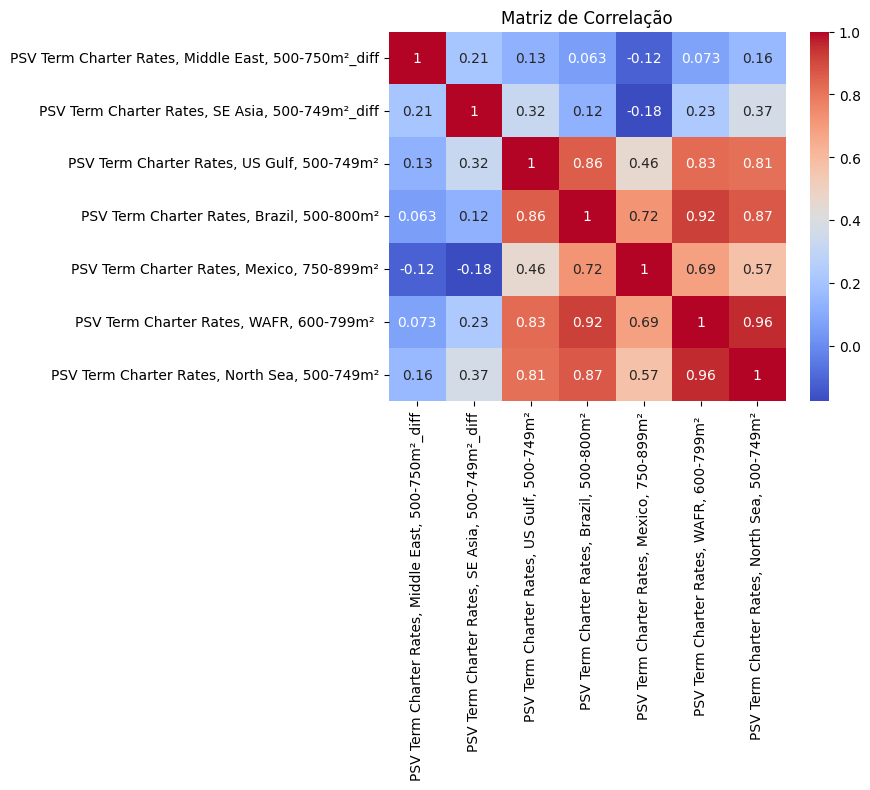

In [ ]:
# Análise de Multicolinearidade
corr_matrix = model_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

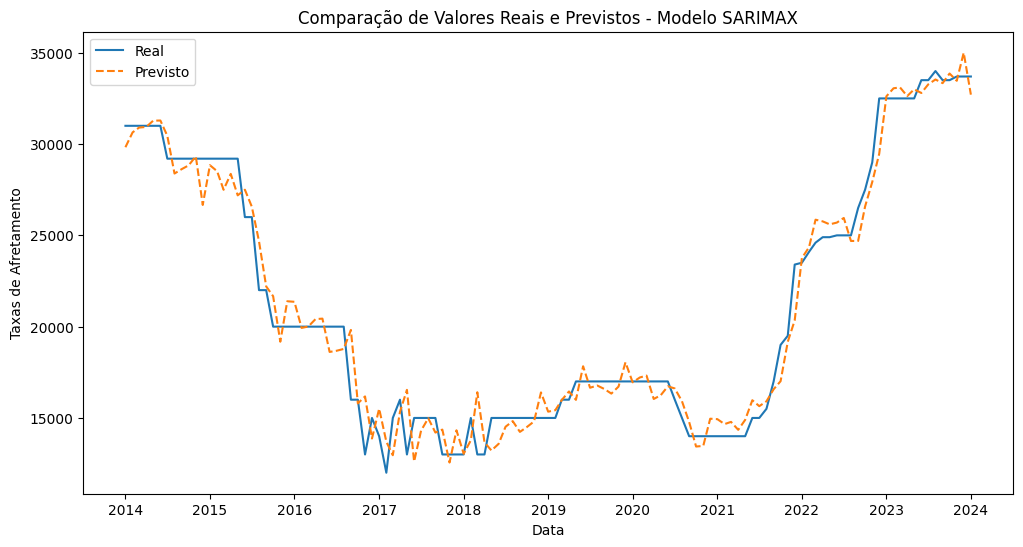

In [ ]:
# Obter os valores previstos para o período da série original
predictions = sarimax_fitted.predict(start=model_data.index[0],
                                     end=model_data.index[-1],
                                     exog=model_data.drop(columns=['PSV Term Charter Rates, Brazil, 500-800m²']))

# Plotar os valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(model_data.index, model_data['PSV Term Charter Rates, Brazil, 500-800m²'], label='Real')
plt.plot(predictions.index, predictions, label='Previsto', linestyle='--')  # Usando predictions
plt.title('Comparação de Valores Reais e Previstos - Modelo SARIMAX')
plt.xlabel('Data')
plt.ylabel('Taxas de Afretamento')
plt.legend()
plt.show()

Ljung-Box Test:
      lb_stat  lb_pvalue
12  10.538299   0.568845
Jarque-Bera Test:
Statistic: 7.574398882764375, p-value: 0.022658970851493137


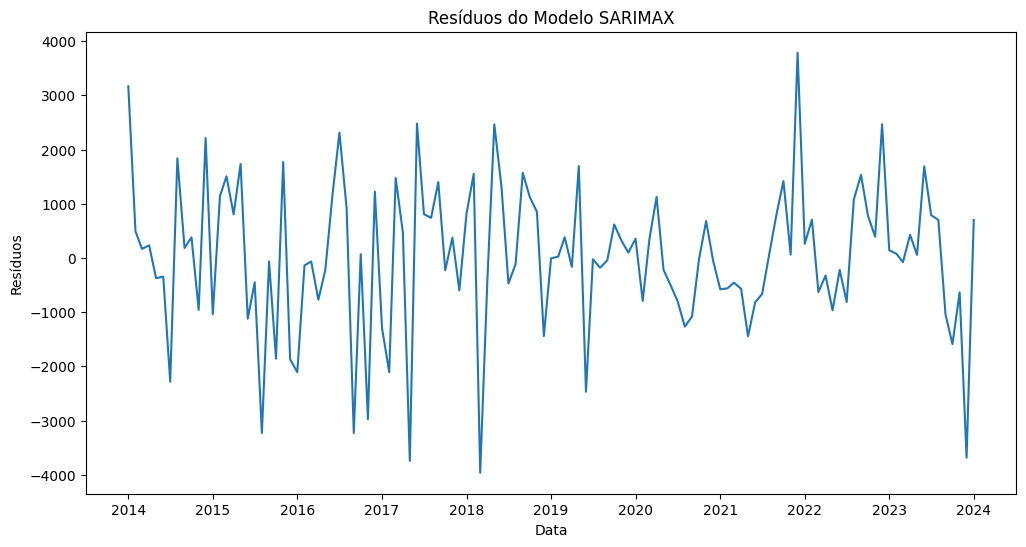

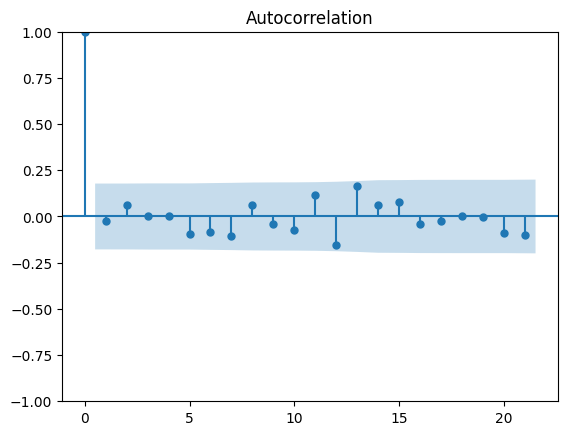

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
# Teste de Ljung-Box para autocorrelação dos resíduos
ljung_box_test = acorr_ljungbox(sarimax_fitted.resid, lags=[12], return_df=True)
print('Ljung-Box Test:')
print(ljung_box_test)

# Teste de Jarque-Bera para normalidade dos resíduos
jarque_bera_test = jarque_bera(sarimax_fitted.resid)
print('Jarque-Bera Test:')
print(f'Statistic: {jarque_bera_test[0]}, p-value: {jarque_bera_test[1]}')

# Plotar resíduos
plt.figure(figsize=(12, 6))
plt.plot(sarimax_fitted.resid)
plt.title('Resíduos do Modelo SARIMAX')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.show()

# Plotar ACF dos resíduos
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sarimax_fitted.resid)
plt.show()


Text(0.5, 0, 'Residuals')

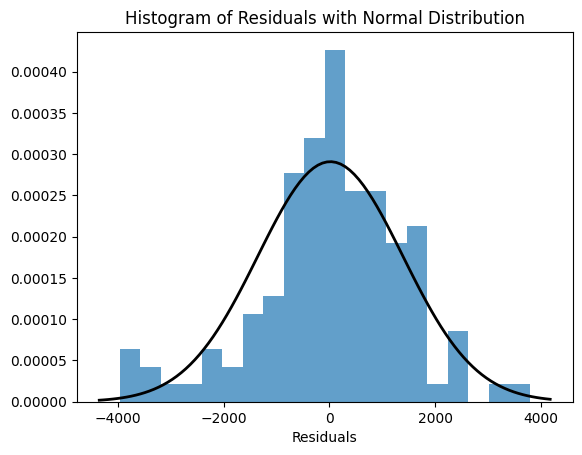

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Assuming 'sarimax_model' contains your model sarimax_model
plt.hist(sarimax_fitted.resid, bins=20, density=True, alpha=0.7, label='residuals')  # Histogram of sarimax_model

# Generate data for the normal distribution curve
xmin, xmax = plt.xlim()  # Get x-axis limits from the histogram
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, np.mean(sarimax_fitted.resid), np.std(sarimax_fitted.resid))  # Calculate normal PDF

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')  # Black line for normal curve

plt.title('Histogram of Residuals with Normal Distribution')
plt.xlabel('Residuals')

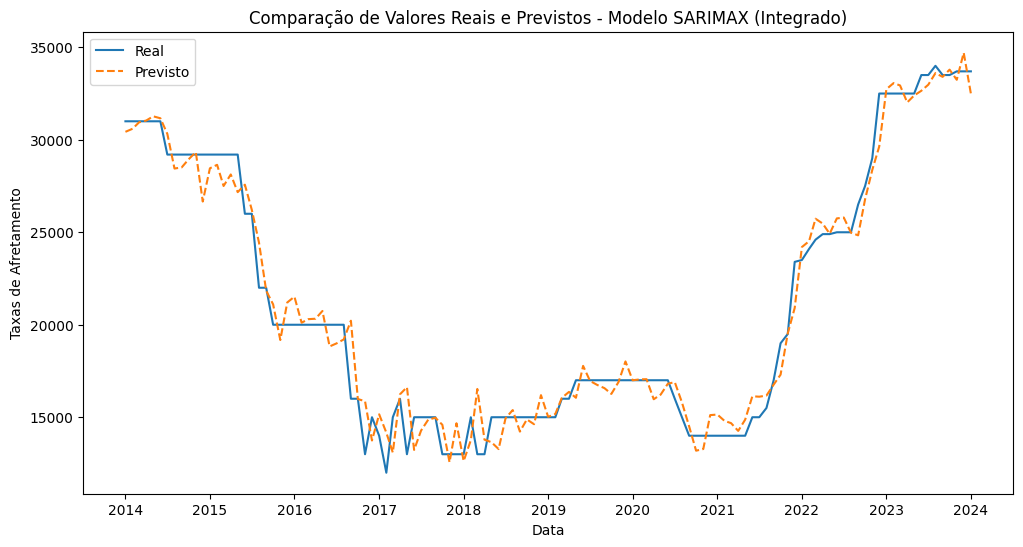

In [ ]:
# Ajustar um modelo SARIMAX para o Modelo 2
model_data.index.freq = 'MS'
sarimax_model = SARIMAX(model_data['PSV Term Charter Rates, Brazil, 500-800m²'],
                        exog=model_data.drop(columns=['PSV Term Charter Rates, Brazil, 500-800m²']),
                        order=(0, 1, 7), seasonal_order=(1, 1, 1, 12))
sarimax_fitted = sarimax_model.fit(disp=False, maxiter=1000)

real = model_data['PSV Term Charter Rates, Brazil, 500-800m²']

# Obter os valores previstos para o período da série original
predictions = sarimax_fitted.predict(start=model_data.index[0],
                                     end=model_data.index[-1],
                                     exog=model_data.drop(columns=['PSV Term Charter Rates, Brazil, 500-800m²']))

plt.figure(figsize=(12, 6))
plt.plot(model_data.index, real, label='Real')
plt.plot(predictions.index, predictions, label='Previsto', linestyle='--')
plt.title('Comparação de Valores Reais e Previstos - Modelo SARIMAX (Integrado)')
plt.xlabel('Data')
plt.ylabel('Taxas de Afretamento')
plt.legend()
plt.show()

Verificando o ajuste do modelo.

Ljung-Box Test:
     lb_stat  lb_pvalue
12  6.955994   0.860508
Jarque-Bera Test:
Statistic: 22.84633164477087, p-value: 1.0939113224062082e-05


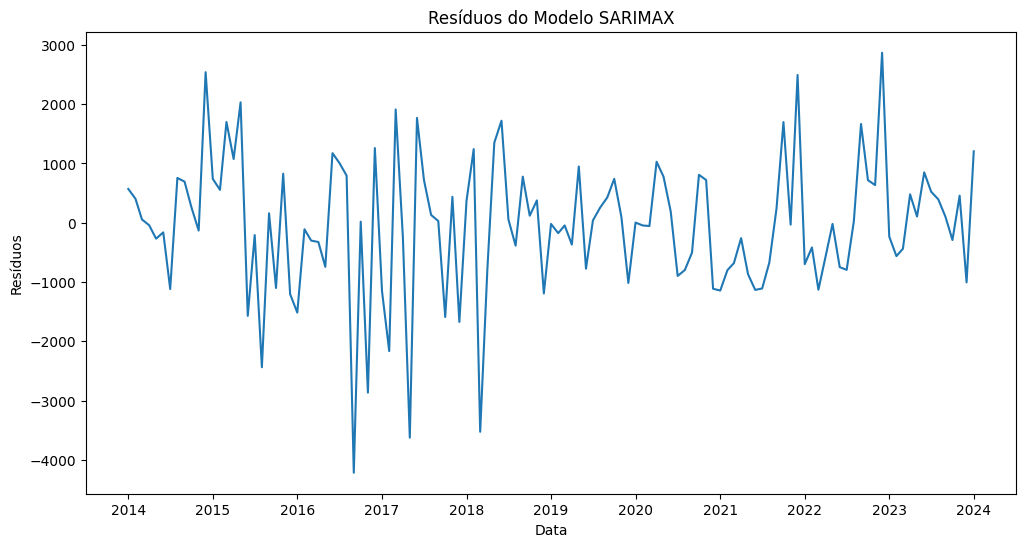

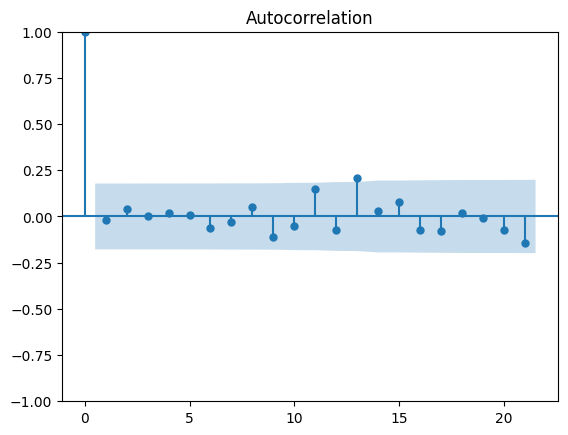

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
# Teste de Ljung-Box para autocorrelação dos resíduos
ljung_box_test = acorr_ljungbox(sarimax_fitted.resid, lags=[12], return_df=True)
print('Ljung-Box Test:')
print(ljung_box_test)

# Teste de Jarque-Bera para normalidade dos resíduos
jarque_bera_test = jarque_bera(sarimax_fitted.resid)
print('Jarque-Bera Test:')
print(f'Statistic: {jarque_bera_test[0]}, p-value: {jarque_bera_test[1]}')

# Plotar resíduos
plt.figure(figsize=(12, 6))
plt.plot(sarimax_fitted.resid)
plt.title('Resíduos do Modelo SARIMAX')
plt.xlabel('Data')
plt.ylabel('Resíduos')
plt.show()

# Plotar ACF dos resíduos
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sarimax_fitted.resid)
plt.show()

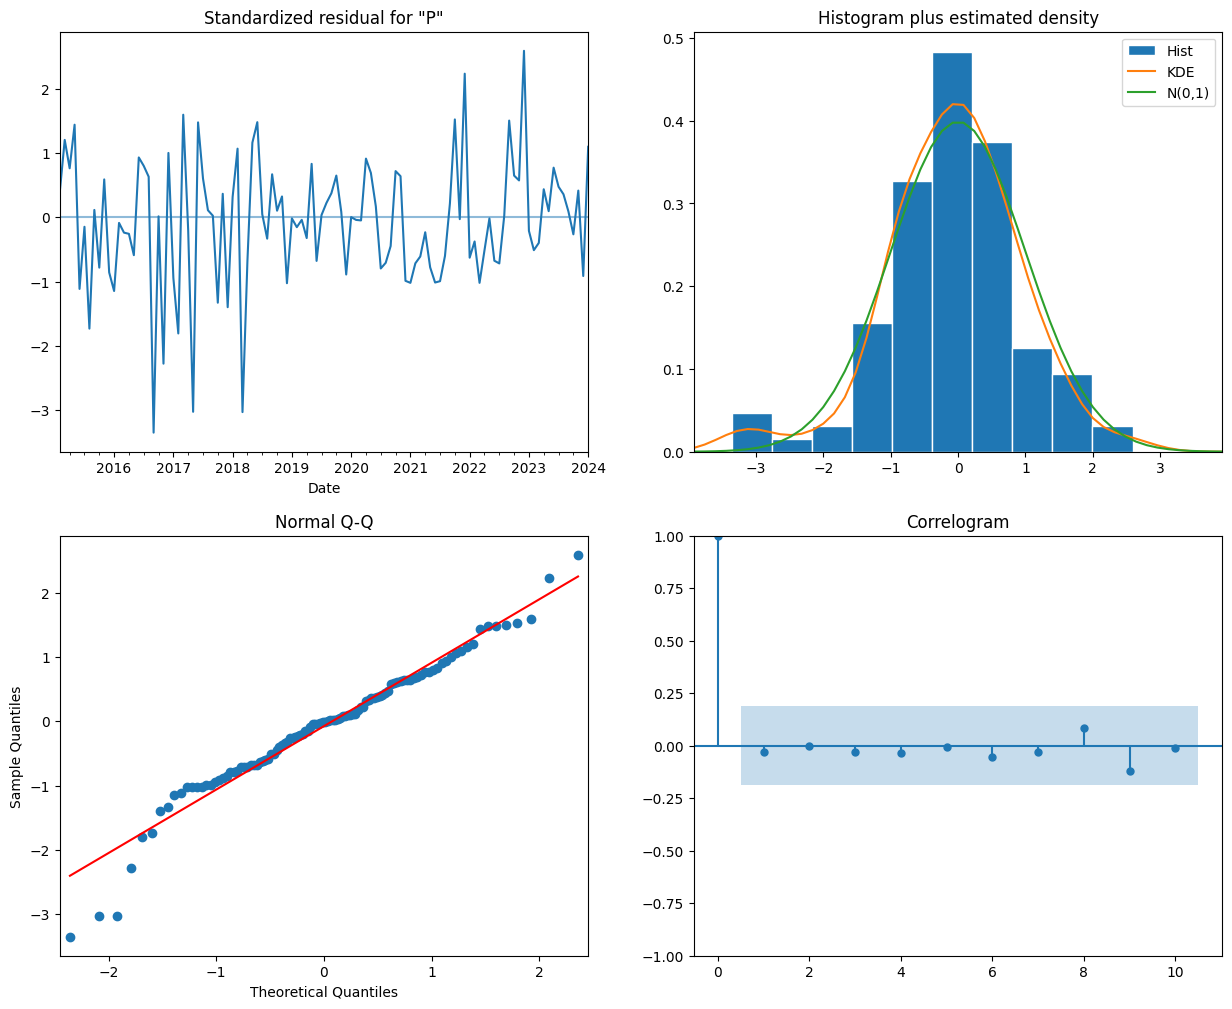

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming `results` is your fitted SARIMAX model
# Plot diagnostics
sarimax_fitted.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox, het_breuschpagan
from statsmodels.stats.stattools import jarque_bera
from itertools import product

# Certifique-se de que `exog` contenha as variáveis diferenciadas
# Certifique-se de que `exog` contenha as variáveis diferenciadas
endog = model_data['PSV Term Charter Rates, Brazil, 500-800m²']
exog=model_data.drop(columns=['PSV Term Charter Rates, Brazil, 500-800m²'])
exog['Constant'] = np.ones(len(exog))  # Creates a new column named "Constant"

# Defina o intervalo de valores de p e q para testar
p_values = range(1, 13)
q_values = range(0, 13)

# Inicialize variáveis para armazenar o melhor modelo e seus parâmetros
best_aic = float('inf')
best_bic = float('inf')
best_model = None
best_params = (0, 0)

# Loop sobre todas as combinações de valores de p e q
for p, q in product(p_values, q_values):
    try:
        # Defina a ordem e a ordem sazonal (supondo sem sazonalidade para simplicidade)
        order = (p, 1, q)  # Supondo d=1 para diferenciação
        seasonal_order = (1, 1, 1, 12)  # Sem sazonalidade

        # Ajuste o modelo SARIMAX
        model = sm.tsa.SARIMAX(endog, order=order, seasonal_order=seasonal_order, exog=exog)
        results = model.fit(disp=False, maxiter=1000)  # Experimente diferentes métodos de otimização

        # Calcule os diagnósticos do modelo
        ljung_box_pvalue = acorr_ljungbox(results.resid, lags=[10], return_df=True)['lb_pvalue'].values[0]
        jb_pvalue = jarque_bera(results.resid)[1]
        _, bp_pvalue, _, _ = het_breuschpagan(results.resid, results.model.exog)

        # Descartar modelos com p-valor do teste de Ljung-Box < 0.05
        if ljung_box_pvalue < 0.05:
            continue

        # Preferir modelos com p-valor do teste de Jarque-Bera > 0.05
        if jb_pvalue > 0.05:
            best_model = results
            best_params = (p, q)
            break

        # Verifique se este modelo é melhor com base em AIC e BIC
        if results.aic < best_aic and results.bic < best_bic:
            best_aic = results.aic
            best_bic = results.bic
            best_model = results
            best_params = (p, q)

    except Exception as e:
        print(f"Modelo com parâmetros p={p}, q={q} falhou ao ajustar. Erro: {e}")

# Imprima os melhores parâmetros do modelo e seu resumo
print(f"Melhores parâmetros do modelo: p={best_params[0]}, q={best_params[1]}")
if best_model:
    print(best_model.summary())

    # Realize testes diagnósticos no melhor modelo
    ljung_box_pvalue = acorr_ljungbox(best_model.resid, lags=[10], return_df=True)['lb_pvalue'].values[0]
    jb_test_statistic, jb_pvalue, skew, kurtosis = jarque_bera(best_model.resid)
    _, bp_pvalue, _, _ = het_breuschpagan(best_model.resid, best_model.model.exog)

    print(f"Ljung-Box test p-value: {ljung_box_pvalue}")
    print(f"Jarque-Bera test p-value: {jb_pvalue}")
    print(f"Breusch-Pagan test p-value: {bp_pvalue}")
    print(f"AIC: {best_model.aic}")
    print(f"BIC: {best_model.bic}")
else:
    print("Nenhum modelo adequado foi encontrado.")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Modelo com parâmetros p=1, q=12 falhou ao ajustar. Erro: Invalid model: moving average lag(s) {12} are in both the seasonal and non-seasonal moving average components.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/st

Modelo com parâmetros p=2, q=12 falhou ao ajustar. Erro: Invalid model: moving average lag(s) {12} are in both the seasonal and non-seasonal moving average components.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from scipy import stats

# Função para teste de estacionariedade
def test_stationarity(timeseries, title=''):
    # Realizar teste Dickey-Fuller aumentado
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=[
        'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'
    ])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(f'Stationarity Test Results for {title}:')
    print(dfoutput)

    return dfoutput['p-value'] < 0.05

# Carregar dados (substitua pelo seu caminho de arquivo)
def load_psv_data(filepath):
    df = pd.read_csv(filepath, parse_dates=['Date'], index_col='Date')
    return df

# Preparar dados para ARIMAX
def prepare_arimax_data(df, dependent_var, exog_vars):
    # Diferenciação se necessário
    df_diff = df.copy()
    for col in df.columns:
        if not test_stationarity(df[col], col):
            df_diff[col] = df[col].diff().dropna()

    # Remover NAs
    df_diff = df_diff.dropna()

    # Separar variáveis
    y = df_diff[dependent_var]
    X = df_diff[exog_vars]

    return y, X

# Ajustar modelo ARIMAX
def fit_arimax_model(y, X, order=(1,1,1)):
    # Ajustar modelo ARIMAX
    model = sm.tsa.ARIMA(y, exog=X, order=order)
    results = model.fit()

    return results

# Diagnóstico do modelo
def model_diagnostics(results):
    # Teste de resíduos
    print("\n--- Modelo Diagnóstico ---")

    # 1. Teste de Normalidade dos Resíduos (Jarque-Bera)
    _, p_normality = stats.jarque_bera(results.resid)
    print(f"Teste Jarque-Bera (Normalidade): p-valor = {p_normality}")

    # 2. Teste de Autocorrelação dos Resíduos (Ljung-Box)
    from statsmodels.stats.diagnostic import acorr_ljungbox
    lb_results = acorr_ljungbox(results.resid)
    print("Teste Ljung-Box (Autocorrelação):")
    print(f"p-valores: {lb_results.lb_pvalue}")

    # 3. Gráficos de Diagnóstico
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

    # Resíduos
    results.resid.plot(ax=ax1, title='Resíduos do Modelo')
    ax1.set_xlabel('Data')
    ax1.set_ylabel('Resíduos')

    # Q-Q Plot
    from scipy import stats
    stats.probplot(results.resid, plot=ax2)
    ax2.set_title('Q-Q Plot dos Resíduos')

    plt.tight_layout()
    plt.show()

    # 4. Sumário do modelo
    print("\n--- Sumário do Modelo ---")
    print(results.summary())

# Função principal
def main():
    # Caminho do arquivo (substitua pelo seu)
    filepath = '2024-12-09 - P14 Séries Modelo PSV.xlsx'

    # Carregar dados
    df = load_psv_data(filepath)

    # Variáveis
    dependent_var = 'PSV Term Charter Rates, Brazil, 500-800m²'
    exog_vars = [
        'PSV Term Charter Rates, Middle East, 500-750m²',
        'PSV Term Charter Rates, SE Asia, 500-749m²',
        'PSV Term Charter Rates, US Gulf, 500-749m²',
        'PSV Term Charter Rates, Mexico, 750-899m²',
        'PSV Term Charter Rates, WAFR, 600-799m²',
        'PSV Term Charter Rates, North Sea, 500-749m²'
    ]

    # Preparar dados
    y, X = prepare_arimax_data(df, dependent_var, exog_vars)

    # Ajustar modelo
    results = fit_arimax_model(y, X)

    # Diagnóstico
    model_diagnostics(results)

if __name__ == "__main__":
    main()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xae in position 15: invalid start byte